In [217]:
# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
import seaborn as sns
from datetime import datetime
from sklearn.metrics import r2_score


import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

In [218]:
# Load data
movies=pd.read_csv('movies.csv')

In [219]:
#clean
del movies['Unnamed: 0']
movies=movies.dropna()

#movies

In [220]:
R_time=[]
for i in range(len(movies.Runtime)):
         R_time.append(int(movies.Runtime[i][0:movies.Runtime[i].find('min')].strip().lower()))

In [221]:
#R_time
movies['Runtime']=R_time

In [222]:
#datetime.strptime(movies.ReleaseDate[0],'%b %d %Y').year

In [223]:
#convert format of ReleaseDate

m_date=[]
for d in range(len(movies.ReleaseDate)):
         
        #m_date.append(datetime.strptime(movies.ReleaseDate[d],'%b %d %Y').year)
        m_date.append(datetime.strptime(movies.ReleaseDate[d],'%b %d %Y'))

In [224]:
movies['ReleaseDate']=m_date

Feature Engineering

In [225]:
#Create new variable "Primetime", indicating if a movie was released during a typically successful time of year (summer or holiday season).


primetime=[]

for e in m_date:
    try:
        d3=e.month
        if d3 in [5,6,7,11,12]:
            primetime.append(1)
        else:
            primetime.append(0)
    except:
        primetime.append(np.nan)

In [226]:
movies['primetime']=primetime
movies

,Title,Rating,Runtime,IMDB_Score,Action,Adventure,Biography,Comedy,Crime,Documentary,...,Thriller,War,Western,Theaters,Total Gross,Budget,DomesticGross,WorldwideGross,ReleaseDate,primetime
0,Casino Royale,4.0,144,8.0,1,1,0,0,0,0,...,1,0,0,3434,167445960,102000000,167365000,594420283,2006-11-17,1
1,Casino Royale,4.0,144,8.0,1,1,0,0,0,0,...,1,0,0,3434,167445960,12000000,22744718,41744718,1967-04-28,0
2,Dune,2.0,137,6.4,1,1,0,0,0,0,...,0,0,0,4125,17500000,165000000,40100000,161664741,2021-09-15,0
3,Dune,2.0,137,6.4,1,1,0,0,0,0,...,0,0,0,4125,17500000,45000000,27447471,27449336,1984-12-14,1
4,It,2.0,192,6.8,0,0,0,0,0,0,...,0,0,0,4103,327481748,35000000,328828874,701083042,2017-08-31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,The Taking of Pelham 123,3.0,106,6.4,1,0,0,0,1,0,...,1,0,0,3074,65452312,110000000,65452312,152364370,2009-06-12,1
133,The Stepford Wives,4.0,93,5.3,0,0,0,1,0,0,...,0,0,0,3057,59484742,100000000,59475623,96150482,2004-06-11,1
134,Diary of a Wimpy Kid: Rodrick Rules,2.0,100,6.5,0,0,0,1,0,0,...,0,0,0,3167,52698535,18000000,52698535,73695194,2011-03-25,0
135,Captain Underpants: The First Epic Movie,2.0,89,6.2,1,1,0,0,0,0,...,0,0,0,3434,73921000,38000000,73921000,126422949,2017-06-02,1


In [227]:
#for i in  range(0,138):
    #if movies.Title[i] == movies.Title[i+1]:
       # if movies.WorldwideGross[i+1] < movies.WorldwideGross[i]:
           # a=movies.WorldwideGross[i]
            #b=movies.WorldwideGross[i+1]
            #print(movies.Title[i])
            #print(b)
            #c=movies.values[i+1]
            #print(c)
            #movies.drop([i+1], axis=0, inplace=True)
        #else:
            #print('none')
            #del c
            #movies.drop(movies.index[i+1],inplace=True)
            #movies.drop(i+1, axis=0,inplace=True)
            #movies.drop([i+1], axis=0, inplace=True)
            

In [228]:
movies_f=movies 
movies_f.to_csv('movies_f.csv')

In [229]:
#Visualizing with Seaborn

# View the correlations
movies_f.corr()

,Rating,Runtime,IMDB_Score,Action,Adventure,Biography,Comedy,Crime,Documentary,Drama,...,Sport,Thriller,War,Western,Theaters,Total Gross,Budget,DomesticGross,WorldwideGross,primetime
Rating,1.000000,0.132716,-0.012565,0.350835,-0.280429,0.137957,-0.372070,0.111351,NaN,0.110413,...,NaN,0.247670,NaN,NaN,-0.193060,-0.277753,-0.006567,-0.149160,-0.131626,-0.012069
Runtime,0.132716,1.000000,0.363173,0.185857,0.008638,0.089683,-0.346920,-0.011381,NaN,0.242785,...,NaN,0.013797,NaN,NaN,0.118982,0.288743,0.176353,0.387174,0.416303,0.165946
IMDB_Score,-0.012565,0.363173,1.000000,0.154478,0.153326,0.040721,-0.031838,-0.015845,NaN,0.042047,...,NaN,0.002734,NaN,NaN,-0.046921,0.296121,0.161917,0.279579,0.285518,0.152645
Action,0.350835,0.185857,0.154478,1.000000,0.397552,-0.035839,-0.315659,-0.101341,NaN,-0.329594,...,NaN,-0.008073,NaN,NaN,0.173296,0.066323,0.351855,0.183346,0.200522,0.295002
Adventure,-0.280429,0.008638,0.153326,0.397552,1.000000,-0.162164,0.094659,-0.269896,NaN,-0.396841,...,NaN,-0.426494,NaN,NaN,0.432397,0.388478,0.415195,0.286586,0.320151,0.218127
Biography,0.137957,0.089683,0.040721,-0.035839,-0.162164,1.000000,-0.070692,-0.037261,NaN,0.203743,...,NaN,-0.074130,NaN,NaN,-0.139263,-0.072940,-0.064291,-0.047701,-0.067521,-0.040133
Comedy,-0.372070,-0.346920,-0.031838,-0.315659,0.094659,-0.070692,1.000000,-0.037061,NaN,-0.148906,...,NaN,-0.234070,NaN,NaN,0.010711,0.135880,-0.067512,0.031103,-0.030956,-0.063591
Crime,0.111351,-0.011381,-0.015845,-0.101341,-0.269896,-0.037261,-0.037061,1.000000,NaN,0.078107,...,NaN,0.267889,NaN,NaN,-0.230894,-0.168653,-0.037857,-0.127197,-0.130117,-0.045997
Documentary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Drama,0.110413,0.242785,0.042047,-0.329594,-0.396841,0.203743,-0.148906,0.078107,NaN,1.000000,...,NaN,-0.017687,NaN,NaN,-0.201265,-0.037612,-0.239449,-0.006287,-0.041656,-0.074314


# Modeling


In [230]:
#sns.pairplot(movies, height=1.2, aspect=1.5);

In [231]:
hm_df=movies_f[["Runtime",'Drama',"Theaters","Budget","DomesticGross",'WorldwideGross']]

In [232]:
f_e=movies_f[['primetime',"Theaters","Budget","DomesticGross",'WorldwideGross']]

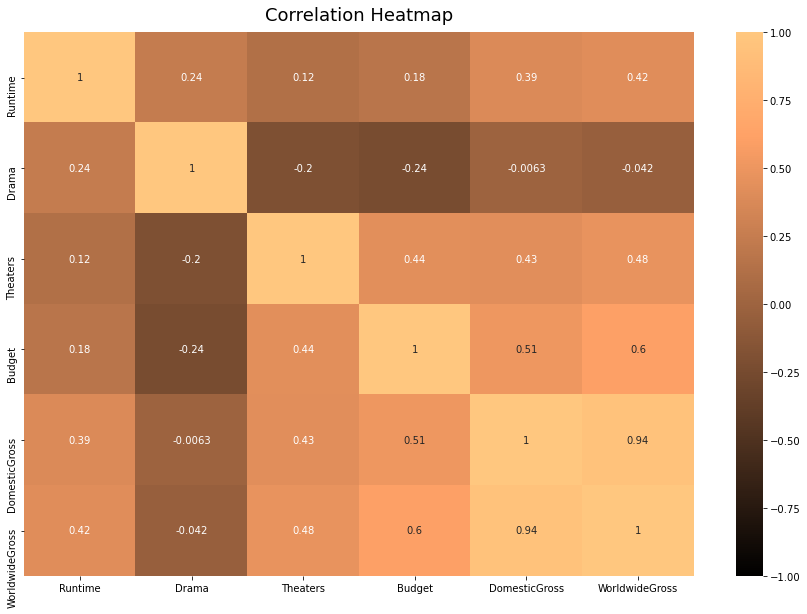

In [233]:
plt.figure(figsize=(15,10))
heatmap = sns.heatmap(hm_df.corr(), vmin=-1, vmax=1, annot=True, cmap="copper")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.show()




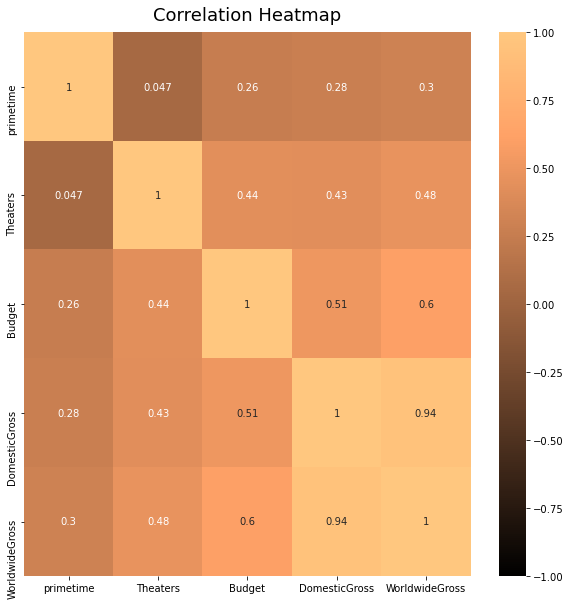

In [234]:
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(f_e.corr(), vmin=-1, vmax=1, annot=True, cmap="copper")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.show()

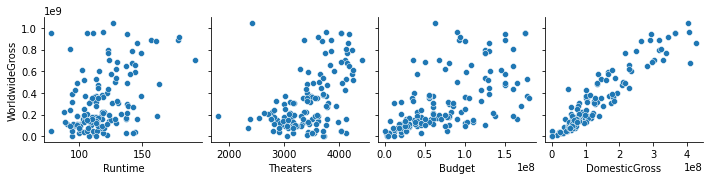

In [235]:
sns.pairplot(
    movies_f,
    x_vars=["Runtime","Theaters","Budget","DomesticGross"],
    y_vars=["WorldwideGross"],
)


In [236]:
#1
#x=Rating','Runtime','IMDB_Score','Budget','Theaters''primetime'
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization+
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold
#first
X, y = movies_f[['Rating','Runtime','IMDB_Score','Budget','Theaters','primetime']], movies['WorldwideGross']

#hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) 

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [237]:
#run the CV

kf = KFold(n_splits=5, shuffle=True, random_state = 70)
cv_lm_r2s, cv_lm_reg_r2s ,cv_lm_las_r2s= [], [] ,[]#collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()
    lm_reg = Ridge(alpha=1)

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))
    
    #lasso with feature scaling
    lr_model_lasso = Lasso(alpha = 100000)
    lr_model_lasso.fit(X_train, y_train)
    cv_lm_las_r2s.append(lr_model_lasso.score(X_val_scaled, y_val))

print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: ', cv_lm_reg_r2s, '\n')
print('lasso scores: ', cv_lm_las_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')
print(f'lasso mean cv r^2: {np.mean(cv_lm_las_r2s):.3f} +- {np.std(cv_lm_las_r2s):.3f}')

Simple regression scores:  [0.7633481643133225, 0.4585086359441505, 0.49782301692982656, 0.33094440960759963, 0.536959738755981]
Ridge scores:  [0.7633204659841664, 0.4621158071583429, 0.49974209531268654, 0.3318616373992822, 0.5366971440738374] 

lasso scores:  [-20.00935496948088, -30.102577608112707, -28.124212487553567, -20.69459060562868, -21.50856577510955] 

Simple mean cv r^2: 0.518 +- 0.141
Ridge mean cv r^2: 0.519 +- 0.140
lasso mean cv r^2: -24.088 +- 4.178


In [238]:
lm_preds_1 =lm.predict(X_test) # generate predictions for X using simple linear regression fit model
lm.score(X_val,y_val)

0.536959738755981

In [239]:
r2_score(y_test,lm_preds_1)

0.3076512010029575

In [241]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
#RMSE and MAE 
rmse = mean_squared_error(y_test, lm_preds, squared=False)
mae = mean_absolute_error(y_test, lm_preds)
print(rmse)
print(mae)

102339367.19261374
80468201.38492724


In [242]:
lm_reg_preds_1 =lm_reg.predict(X_test) # generate predictions for X using ridge fit model
lm_reg.score(X_val,y_val)

-1399987214607101.5

In [243]:
r2_score(y_test,lm_reg_preds_1)

-1838338934911802.8

In [245]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
#RMSE and MAE 
rmse = mean_squared_error(y_test, lm_reg_preds, squared=False)
mae = mean_absolute_error(y_test, lm_reg_preds)
print(rmse)
print(mae)

4.0892352336480136e+16
3.4179929384007876e+16


In [246]:
lr_lasso_preds_1 =lr_model_lasso.predict(X_test) # generate predictions for X using ridge fit model
lr_model_lasso.score(X_val,y_val)

0.5373794564754895

In [247]:
r2_score(y_test,lr_lasso_preds_1)

0.3073116321469026

In [249]:

#RMSE and MAE 
rmse = mean_squared_error(y_test, lr_lasso_preds, squared=False)
mae = mean_absolute_error(y_test, lr_lasso_preds)
print(rmse)
print(mae)

102244409.31954108
80357952.99594386


In [250]:
#2
##x=movies[['Theaters','Budget','DomesticGross','drama']]

X, y = movies_f[['Budget','Drama','Theaters','DomesticGross']], movies['WorldwideGross']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) #hold out 20% of the data for final testing

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [251]:
#run the CV

kf = KFold(n_splits=5, shuffle=True, random_state = 70)
cv_lm_r2s, cv_lm_reg_r2s ,cv_lm_las_r2s= [], [] ,[]#collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()
    lm_reg = Ridge(alpha=1)

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))
    
    #lasso with feature scaling
    lr_model_lasso = Lasso(alpha = 100000)
    lr_model_lasso.fit(X_train, y_train)
    cv_lm_las_r2s.append(lr_model_lasso.score(X_val_scaled, y_val))

print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: ', cv_lm_reg_r2s, '\n')
print('lasso scores: ', cv_lm_las_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')
print(f'lasso mean cv r^2: {np.mean(cv_lm_las_r2s):.3f} +- {np.std(cv_lm_las_r2s):.3f}')

Simple regression scores:  [0.9024530438763168, 0.9162772342266567, 0.9146666634771674, 0.8773781237577677, 0.9225003028513562]
Ridge scores:  [0.9038047652846204, 0.9179653269237106, 0.9124074576684605, 0.8767803189945754, 0.9225849281714145] 

lasso scores:  [-2.6492570926437082, -2.583744594915966, -3.2845916808997897, -3.383673106031134, -2.3444321680197624] 

Simple mean cv r^2: 0.907 +- 0.016
Ridge mean cv r^2: 0.907 +- 0.016
lasso mean cv r^2: -2.849 +- 0.410


In [252]:
# generate predictions for X using lm fit model
y_lm_preds =lm.predict(X_test) 
lm.score(X_val,y_val)

0.9225003028513562

In [253]:
#r2
r2_score(y_test,y_lm_preds)

0.8352847528337612

In [255]:
#RMSE and MAE 
rmse = mean_squared_error(y_test, lm_preds, squared=False)
mae = mean_absolute_error(y_test, lm_preds)
print(rmse)
print(mae)

102339367.19261374
80468201.38492724


In [256]:
# generate predictions for X using ridge fit model
lm_reg_preds =lm_reg.predict(X_test) 
lm_reg.score(X_val,y_val)

-2.3607416564095268e+16

In [257]:
r2_score(y_test,lm_reg_preds)

-2.6298594339530064e+16

In [259]:
#RMSE and MAE 
rmse = mean_squared_error(y_test, lm_reg_preds, squared=False)
mae = mean_absolute_error(y_test, lm_reg_preds)
print(rmse)
print(mae)

4.0892352336480136e+16
3.4179929384007876e+16


In [260]:
# generate predictions for X using lasso fit model
lr_lasso_preds =lr_model_lasso.predict(X_test) 
lr_model_lasso.score(X_val,y_val)

0.9226501139894288

In [261]:
r2_score(y_test,lr_lasso_preds)

0.8355902804822503

In [262]:
#RMSE and MAE 
rmse = mean_squared_error(y_test, lr_lasso_preds, squared=False)
mae = mean_absolute_error(y_test, lr_lasso_preds)
print(rmse)
print(mae)

102244409.31954108
80357952.99594386


In [263]:
#3
#x=Budget','primetime','Theaters','DomesticGross'

X, y = movies[['Budget','primetime','Theaters','DomesticGross']], movies['WorldwideGross']


X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) #hold out 20% of the data for final testing

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [264]:
#run the CV

kf = KFold(n_splits=5, shuffle=True, random_state = 70)
cv_lm_r2s, cv_lm_reg_r2s ,cv_lm_las_r2s= [], [] ,[]#collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind],y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()
    lm_reg = Ridge(alpha=1)

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))
    
    #lasso with feature scaling
    lr_model_lasso = Lasso(alpha = 100000)
    lr_model_lasso.fit(X_train, y_train)
    cv_lm_las_r2s.append(lr_model_lasso.score(X_val_scaled, y_val))

print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: ', cv_lm_reg_r2s, '\n')
print('lasso scores: ', cv_lm_las_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')
print(f'lasso mean cv r^2: {np.mean(cv_lm_las_r2s):.3f} +- {np.std(cv_lm_las_r2s):.3f}')

Simple regression scores:  [0.9030315088826437, 0.9132959241823817, 0.9114542255661365, 0.8650234065784386, 0.918191495408943]
Ridge scores:  [0.9037874552287439, 0.9150482959870304, 0.9092990721557475, 0.8657048765551798, 0.9168724903872361] 

lasso scores:  [-2.3703065427789554, -2.3822012883415775, -3.0967975292027967, -3.2217638445618064, -1.9811388101216711] 

Simple mean cv r^2: 0.902 +- 0.019
Ridge mean cv r^2: 0.902 +- 0.019
lasso mean cv r^2: -2.610 +- 0.472


In [265]:
 # generate predictions for X using fit model
y_preds =lm.predict(X_test)
lm.score(X_val,y_val)

0.918191495408943

In [266]:
r2_score(y_test,y_preds)

0.8580928012577907

In [267]:
#RMSE and MAE 
rmse = mean_squared_error(y_test, lm_preds, squared=False)
mae = mean_absolute_error(y_test, lm_preds)
print(rmse)
print(mae)

102339367.19261374
80468201.38492724


In [268]:
# generate predictions for X using ridge fit model
y_ridge_preds =lm_reg.predict(X_test) 
lm_reg.score(X_val,y_val)

-2.2386308748187156e+16

In [269]:
r2_score(y_test,y_ridge_preds)

-2.4831148192428876e+16

In [270]:
#RMSE and MAE for ridge  model
rmse = mean_squared_error(y_test, lm_reg_preds, squared=False)
mae = mean_absolute_error(y_test, lm_reg_preds)
print(rmse)
print(mae)

4.0892352336480136e+16
3.4179929384007876e+16


In [271]:
# generate predictions for X using lasso fit model
y_lasso_preds =lr_model_lasso.predict(X_test) 
lr_model_lasso.score(X_val,y_val)

0.9184506638880298

In [272]:
r2_score(y_test,y_lasso_preds)

0.8580603315664269

In [273]:
#RMSE and MAE for lasso fit model
rmse = mean_squared_error(y_test, lr_lasso_preds, squared=False)
mae = mean_absolute_error(y_test, lr_lasso_preds)
print(rmse)
print(mae)

102244409.31954108
80357952.99594386


In [274]:
x_lasso_transform = (X_test*lr_model_lasso.coef_).sum(axis=1)
x2_lasso_transform = (X_train*lr_model_lasso.coef_).sum(axis=1)

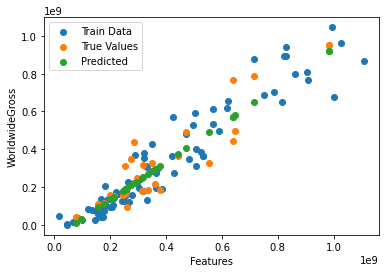

In [275]:
plt.scatter(x2_lasso_transform, y_train, label='Train Data')
plt.scatter(x_lasso_transform, y_test , label='True Values')
plt.scatter(x_lasso_transform, y_lasso_preds, label='Predicted')
plt.ylabel('WorldwideGross')
plt.xlabel('Features')
plt.legend();

In [276]:
import scipy.stats as stats
def show_normal_qq(resid):
    stats.probplot(resid, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")
    plt.show()

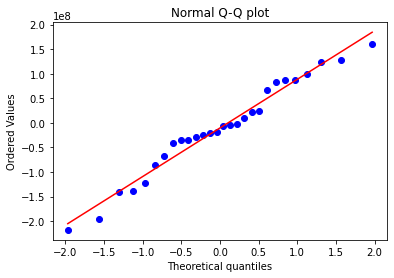

In [277]:
residuals = y_preds - y_test
show_normal_qq(residuals)